In [248]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl

Reading File

In [249]:
print(os.getcwd())
cd=os.getcwd()
file_path='/content/Housing.csv'
df=pd.read_csv(file_path)
df.head()

/content


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


plotting

In [250]:
x=np.array(['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])
x

array(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype='<U16')

In [251]:
y=np.array(['price'])
y

array(['price'], dtype='<U5')

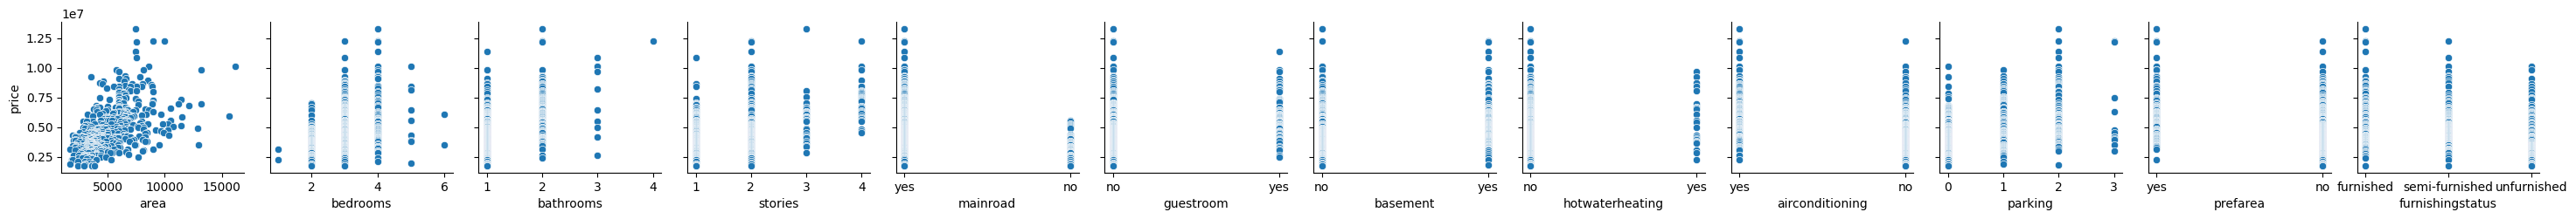

In [252]:
sns.pairplot(df, x_vars=x, y_vars=y,kind='scatter')
plt.show()

In [253]:

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in categorical_cols:
 df[col]=df[col].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [267]:
x=np.array(['area','bathrooms','stories','airconditioning','parking','mainroad','prefarea','basement'])

In [268]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[x],df[y],test_size=0.2,random_state=0)

In [269]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [271]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
mae=np.mean(np.abs(y_pred-y_test))
print("Mean Absolute Error:",mae)

Mean Squared Error: 845069151601.4763
R-squared: 0.7067278074517722
Mean Absolute Error: 666964.6465600595


Checking correlation values to remove features of low corre to improve accuracy

In [258]:
from sklearn.inspection import permutation_importance

# Train a model
model = LinearRegression()
model.fit(x_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Display results
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': perm_importance.importances_mean})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

correlation = df.corrwith(df['price'])
correlation = correlation.sort_values(ascending=False)
print(correlation)

#area,bathrooms,stories,airc,parking,prefarea,mainroad,basement (intersection of both criteria)

             Feature  Importance
0               area    0.193464
2          bathrooms    0.185803
3            stories    0.102628
8    airconditioning    0.100063
9            parking    0.044868
10          prefarea    0.025128
6           basement    0.010190
4           mainroad    0.009855
7    hotwaterheating    0.007648
11  furnishingstatus    0.004772
1           bedrooms    0.002991
5          guestroom   -0.010701
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
dtype: float64
